In [1]:
# Dataset generator - generating symmetric matrices

import numpy as np
import matplotlib.pyplot as plt

dimension_2D=20
n_samples=20
start=0
end=20

# Extracting the distance matrix
f1=open('Dataset1.txt','r')
l1=[]
l1=[line.split() for line in f1]
data_distance=[[] for i in range(len(l1)//20)]
i1=0
j1=0
while True:
    data_distance[i1].append(list(float(x) for x in l1[j1]))
    if((j1+1)%20==0):
        i1+=1
    if(j1==len(l1)-1):
        break
    j1+=1

# Extracting the adjency matrix without distance
f2=open('Dataset2.txt','r')
l2=[]
l2=[line.split() for line in f2]
data_network=[[] for i in range(len(l2)//20)]
i2=0
j2=0
while True:
    data_network[i2].append(list(float(x) for x in l2[j2]))
    if((j2+1)%20==0):
        i2+=1
    if(j2==len(l2)-1):
        break
    j2+=1

data_distance=np.array(data_distance)
data_network=np.array(data_network)

# def dataset_generator():
    # new_arr=[]
    # for i in range(n_samples):
    #     arr = np.random.randint(0,20,size=(dimension_2D,dimension_2D)) #example of a 2-D array
    #     arr=(arr+arr.T)/2
    #     arr=arr*2
    #     arr=arr%2
    #     arr=arr.tolist()
    #     new_arr.append(arr)
    # new_arr=np.array(new_arr)
    # return new_arr


[['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0.00', '0.11', '0.56', '0.28', '0.69', '0.53', '0.69', '0.81', '0.66', '0.89', '0.64', '0.71', '0.94', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0.11', '0.00', '0.51', '0.27', '0.68', '0.47', '0.69', '0.82', '0.76', '0.87', '0.58', '0.80', '1.00', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0.56', '0.51', '0.00', '0.28', '0.27', '0.11', '0.30', '0.43', '0.83', '0.37', '0.12', '0.77', '0.75', '0.00', '0.00', '0.00', '0.00'], ['0.00', '0.00', '0.00', '0

In [18]:
# example of training the discriminator model on real and random mnist images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

# define the standalone discriminator model
def define_discriminator(in_shape=(dimension_2D,dimension_2D,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [19]:
# load and prepare mnist training images
# TARGETS
def load_real_samples():
	# load mnist dataset
	trainX = data_network
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	# X = X / 255.0
	return X

In [20]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	print(ix)
	return X, y

In [21]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(dimension_2D * dimension_2D * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, dimension_2D, dimension_2D, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [22]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=400):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		ix = randint(0, dataset.shape[0], 200)

		# get randomly selected 'real' samples
		# X_real, y_real = generate_real_samples(dataset, half_batch)
		X_real,y_real = dataset[ix],ones((200, 1))

		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)

		# generate 'fake' examples
		# X_fake, y_fake = generate_fake_samples(half_batch)
		X_fake,y_fake = data_distance[ix].reshape((200, dimension_2D, dimension_2D, 1)),zeros((200, 1))

		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)

		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [23]:
#Finally running and training the discriminator

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=54% fake=29%
>2 real=67% fake=23%
>3 real=65% fake=31%
>4 real=68% fake=35%
>5 real=69% fake=41%
>6 real=70% fake=44%
>7 real=73% fake=49%
>8 real=75% fake=51%
>9 real=79% fake=49%
>10 real=75% fake=58%
>11 real=74% fake=57%
>12 real=77% fake=57%
>13 real=72% fake=62%
>14 real=74% fake=62%
>15 real=75% fake=58%
>16 real=73% fake=68%
>17 real=77% fake=67%
>18 real=76% fake=70%
>19 real=73% fake=62%
>20 real=71% fake=71%
>21 real=77% fake=73%
>22 real=82% fake=75%
>23 real=76% fake=71%
>24 real=80% fake=68%
>25 real=74% fake=74%
>26 real=75% fake=69%
>27 real=78% fake=70%
>28 real=77% fake=71%
>29 real=74% fake=69%
>30 real=75% fake=74%
>31 real=76% fake=71%
>32 real=75% fake=76%
>33 real=82% fake=73%
>34 real=73% fake=73%
>35 real=77% fake=74%
>36 real=76% fake=71%
>37 real=74% fake=77%
>38 real=75% fake=75%
>39 real=76% fake=75%
>40 real=73% fake=76%
>41 real=75% fake=74%
>42 real=74% fake=75%
>43 real=82% fake=72%
>44 real=75% fake=75%
>45 real=77% fake=73%
>46 real=77% fake=7

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3200)              1283200   
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 3200)              0         
                                                                 
 reshape_3 (Reshape)         (None, 5, 5, 128)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 10, 10, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 10, 10, 128)       0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 20, 20, 128)      262272    
 ranspose)                                            

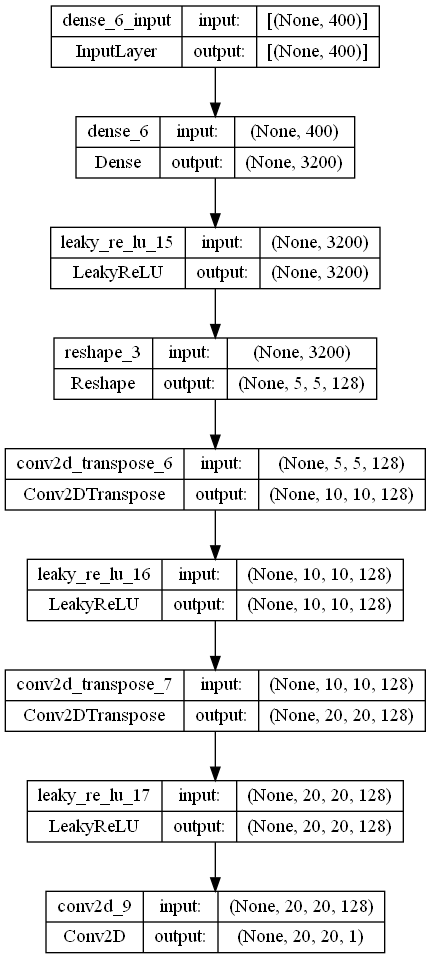

In [24]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model


# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 5x5 image
	n_nodes = 128 * 5 * 5
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((5,5, 128)))
	# upsample to 10x10
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 20x20
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1,(5,5), activation='sigmoid', padding='same'))
	return model

# define the size of the latent space
latent_dim = 400
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
from numpy import zeros
from numpy.random import randn

n_samples=200
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples,ix):
	# ix = randint(0, data_distance.shape[0], 200)

	# generate points in the latent space
	# x_input = randn(latent_dim * n_samples)
	x_input = data_distance[ix]

	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [26]:
ix = randint(0, data_distance.shape[0], 200)
X=generate_latent_points(400,200,ix)
X.shape

(200, 400)

In [27]:
ix = randint(0, data_distance.shape[0], 200)
x_input=data_distance[ix]
x_input=x_input.reshape(n_samples,400)
x_input.shape

(200, 400)

In [28]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples,ix):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples,ix)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

7/7 [==============================] - 0s 22ms/step


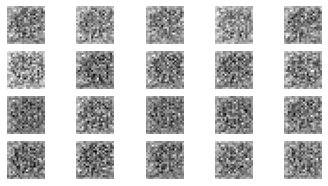

In [29]:
# size of the latent space
latent_dim = 400
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
ix = randint(0, data_distance.shape[0], 200)
X, _ = generate_fake_samples(model, latent_dim, 200, ix)
# plot the generated samples
for i in range(20):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis labels
	plt.axis('off')
	# plot single image
	plt.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
plt.show()

In [30]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 20, 20, 1)         1810945   
                                                                 
 sequential_9 (Sequential)   (None, 1)                 39169     
                                                                 
Total params: 1,850,114
Trainable params: 1,810,945
Non-trainable params: 39,169
_________________________________________________________________


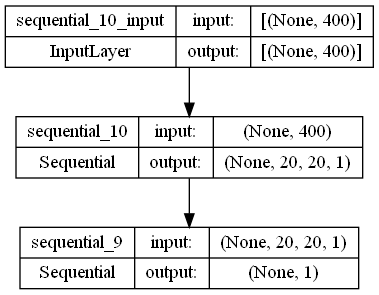

In [31]:
# size of the latent space
latent_dim = 400
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

In [33]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=200):
	ix = randint(0, dataset.shape[0], 200)
	# prepare real samples
	# X_real, y_real = generate_real_samples(dataset, n_samples)
	X_real,y_real = dataset[ix],ones((n_samples, 1))

	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples,ix)

	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

	# save plot
	save_plot(x_fake, epoch)

	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [34]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=400):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)

	# manually enumerate epochs
	for i in range(n_epochs):

		# enumerate batches over the training set
		for j in range(bat_per_epo):
			ix = randint(0, data_distance.shape[0], 200)
			# get randomly selected 'real' samples
			# X_real, y_real = generate_real_samples(dataset, half_batch)
			X_real, y_real = dataset[ix],ones((200, 1))

			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch,ix)

			# create training set for the discriminator
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))

			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, half_batch,ix)

			# create inverted labels for the fake samples
			y_gan = ones((half_batch, 1))
			
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [35]:
#final command
train(g_model, d_model, gan_model, dataset, latent_dim)

7/7 [==============================] - 0s 22ms/step
>1, 1/5, d=0.717, g=0.647
7/7 [==============================] - 0s 24ms/step
>1, 2/5, d=0.703, g=0.658
7/7 [==============================] - 0s 25ms/step
>1, 3/5, d=0.697, g=0.671
7/7 [==============================] - 0s 22ms/step
>1, 4/5, d=0.690, g=0.692
7/7 [==============================] - 0s 24ms/step
>1, 5/5, d=0.682, g=0.705
7/7 [==============================] - 0s 23ms/step
>2, 1/5, d=0.680, g=0.714
7/7 [==============================] - 0s 26ms/step
>2, 2/5, d=0.671, g=0.733
7/7 [==============================] - 0s 23ms/step
>2, 3/5, d=0.668, g=0.743
7/7 [==============================] - 0s 22ms/step
>2, 4/5, d=0.664, g=0.755
7/7 [==============================] - 0s 22ms/step
>2, 5/5, d=0.659, g=0.770
7/7 [==============================] - 0s 23ms/step
>3, 1/5, d=0.656, g=0.771
7/7 [==============================] - 0s 23ms/step
>3, 2/5, d=0.652, g=0.777
7/7 [==============================] - 0s 22ms/step
>3, 3/5, d=0

KeyboardInterrupt: 